In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('facebooklive.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [3]:
features=['num_reactions','num_comments','num_shares','num_likes','num_loves']
X=df[features]
S=StandardScaler()
X_scaled=S.fit_transform(X)

In [4]:
mymodel=KMeans(n_clusters=2,random_state=42)
km=mymodel.fit(X_scaled)
print(km.cluster_centers_)
Yc=km.labels_
print(Yc)

[[-0.06177913 -0.15786978 -0.17198853 -0.04647053 -0.16439716]
 [ 1.17205342  2.99505365  3.26290995  0.8816236   3.11888881]]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'num_loves')

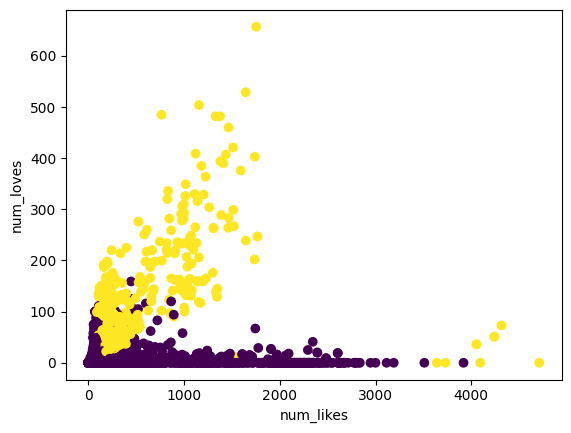

In [5]:
#Understanding Clustering Results with Plots
plt.scatter(X["num_likes"],X["num_loves"],c=Yc, cmap='viridis')
plt.xlabel("num_likes")
plt.ylabel("num_loves")

In [6]:
#Understanding Clustering Results with Metrics
from sklearn.metrics import silhouette_score
ss=silhouette_score(X_scaled, Yc)
print(ss)#Score close to 1 represents good clusters

0.7896699902054702


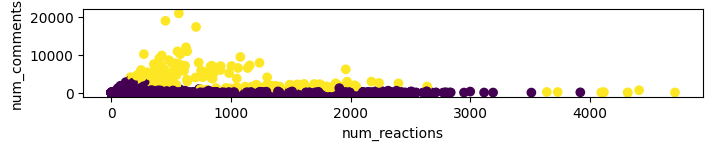

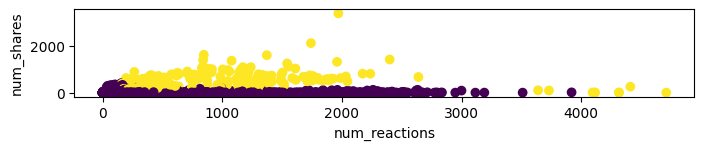

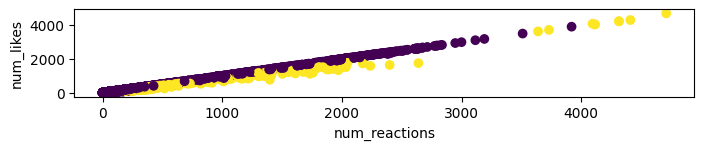

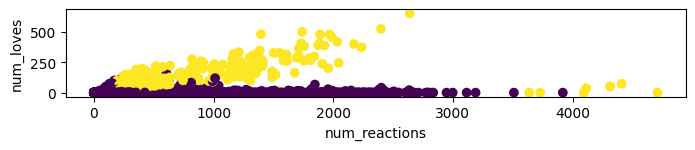

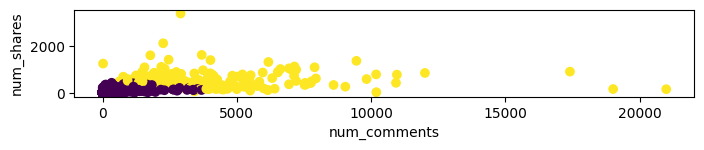

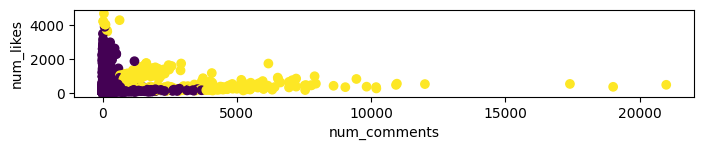

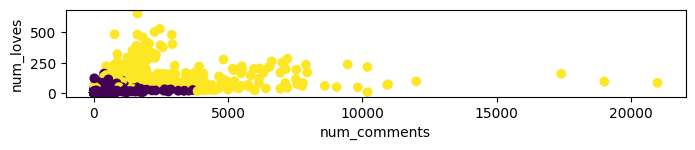

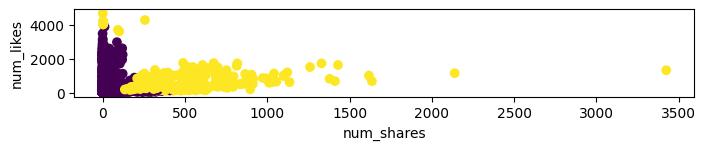

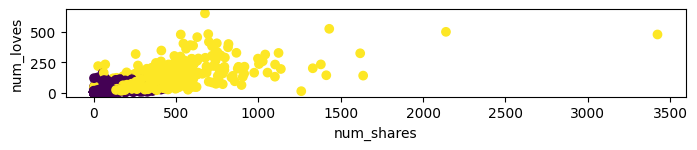

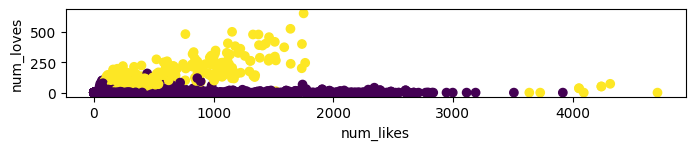

In [7]:
for i in range(5):
    for j in range(i+1,5):
        plt.figure(figsize=(8, 12))
        plt.subplot(9,1,i+j)
        plt.scatter(X[features[i]],X[features[j]],c=Yc, cmap='viridis')
        plt.xlabel(features[i])
        plt.ylabel(features[j])

plt.show()


In [8]:
features=['num_shares','num_loves']
X=df[features]
S=StandardScaler()
X_scaled=S.fit_transform(X)

In [9]:
mymodel=KMeans(n_clusters=2,random_state=42)
km=mymodel.fit(X_scaled)
print(km.cluster_centers_)
Yc=km.labels_
print(Yc)

[[-0.1875742  -0.18562549]
 [ 3.14340336  3.11074664]]
[1 0 0 ... 0 0 0]


0.8813219806430485


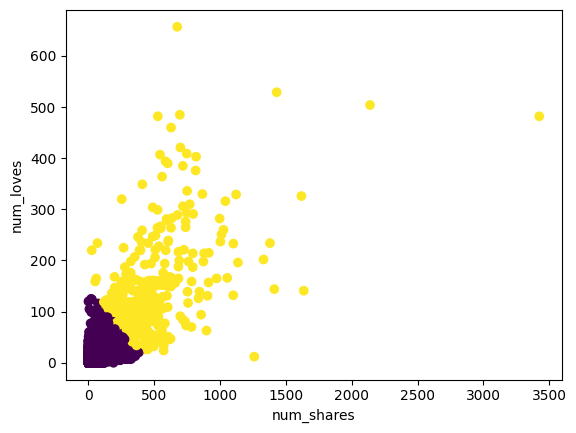

In [10]:
plt.scatter(X["num_shares"],X["num_loves"],c=Yc, cmap='viridis')
plt.xlabel("num_shares")
plt.ylabel("num_loves")
from sklearn.metrics import silhouette_score
ss=silhouette_score(X_scaled, Yc)
print(ss)#Score close to 1 represents good clusters